In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(4, 1), (2, 2), (3, 5), (4, 7), (6, 6), (3, 9), (6, 8), (9, 10), (7, 4), (4, 3), (5, 0)]
polygon_example_colors = [4,4,4,4,3,0,2,0,4,4,1]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [4]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [5]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

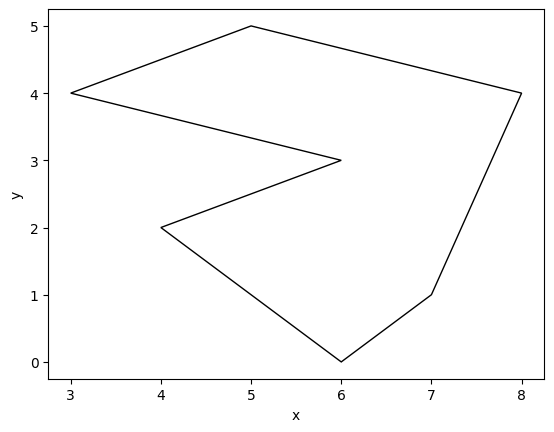

In [6]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

<IPython.core.display.Javascript object>


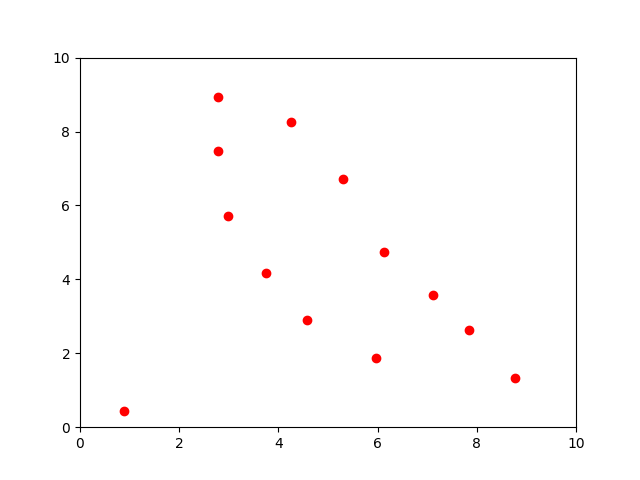

In [32]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.backend_bases import PickEvent
import numpy as np

%matplotlib notebook

class PolygonDrawer:
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.points = []
        self.polygon = None
        self.cid = self.fig.canvas.mpl_connect('button_press_event', self.onClick)

        # Set the limits to create a square with a side length of 10
        self.ax.set_xlim(0, 10)
        self.ax.set_ylim(0, 10)

    def onClick(self, event):
        if event.dblclick:
            # Close the polygon on double-click
            self.drawPolygon()
        else:
            # Add points on single-click
            self.points.append((event.xdata, event.ydata))
            self.drawPoint(event.xdata, event.ydata)

    def drawPoint(self, x, y):
        self.ax.plot(x, y, 'ro')  # Red point

    def drawPolygon(self):
        if len(self.points) > 2:
            # Draw the polygon
            self.points.append(self.points[0])  # Close the polygon
            xs, ys = zip(*self.points)
            self.polygon = Polygon(list(zip(xs, ys)), closed=True, fill=None, edgecolor='b')
            self.ax.add_patch(self.polygon)
            self.fig.canvas.draw()

            # Save the polygon coordinates
            self.savePolygonToFile()

            # Disconnect the click event after drawing the polygon
            self.fig.canvas.mpl_disconnect(self.cid)

    def savePolygonToFile(self):
        # Save the polygon coordinates to a file (e.g., CSV)
        np.savetxt('polygon_coordinates.csv', self.points, delimiter=',')
# Initialize the PolygonDrawer
polygonDrawer = PolygonDrawer()

# plt.show()
polygon = polygonDrawer.points
# draw_polygon(polygon)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [9]:
def is_y_monotonic(p):
    min_y_val = min(p, key = lambda v : v[1])
    max_y_val = max(p, key = lambda v : v[1])
    
    min_y_index = p.index(min_y_val)
    max_y_index = p.index(max_y_val)
    
    n = len(p)
    
    i, j = (max_y_index - 1)%n, (max_y_index + 1) % n
    
    while i != min_y_index:
        if p[i][1] >= p[(i+1)%n][1]:
            return False
        i = (i-1)%n
    
    while j != min_y_index:
        if p[j][1] >= p[(j-1)%n][1]:
            return False
        j = (j+1)%n
    
    return True

Przeprowadź test poprawności powyższej funkcji.

In [23]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Sprawdź monotoniczność swojego wielokątu.

True


<IPython.core.display.Javascript object>


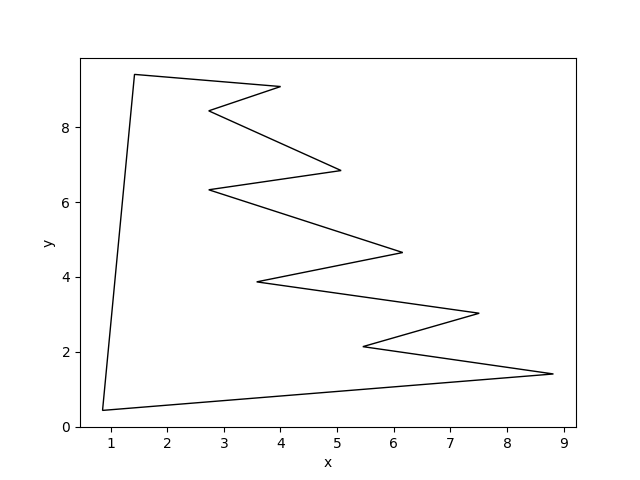

In [10]:
print(is_y_monotonic(polygon))
draw_polygon(polygon)

***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

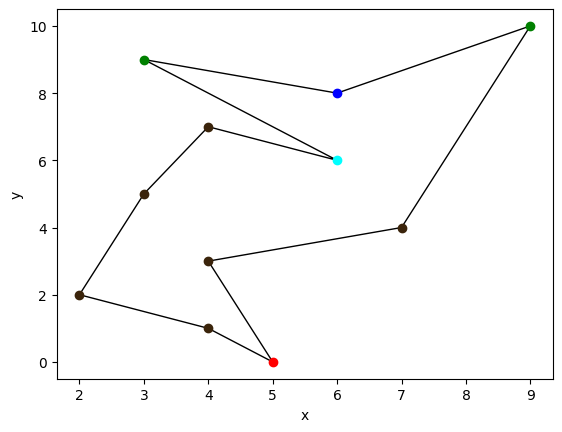

In [7]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [11]:
def color_vertex(polygon):
    
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    def mat_det_3x3(a, b, c):
        x = 0
        y = 1
        return (b[x] - a[x]) * (c[y] - b[y]) - (b[y] - a[y]) * (c[x] - b[x])

    n = len(polygon)
    T = [-1]*n
        
    for i in range(n):
        #begin
        if polygon[(i-1)%n][1] < polygon[i][1] and polygon[(i+1)%n][1] < polygon[i][1] and mat_det_3x3(polygon[(i-1)%n], polygon[i], polygon[(i+1)%n]) > 0:
                T[i] = 0
        #end
        elif polygon[(i-1)%n][1] > polygon[i][1] and polygon[(i+1)%n][1] > polygon[i][1] and mat_det_3x3(polygon[(i-1)%n], polygon[i], polygon[(i+1)%n]) > 0:
                T[i] = 1
        # connect
        elif polygon[(i-1)%n][1] > polygon[i][1] and polygon[(i+1)%n][1] > polygon[i][1] and mat_det_3x3(polygon[(i-1)%n], polygon[i], polygon[(i+1)%n]) < 0:
            T[i] = 2
        # divide
        elif polygon[(i-1)%n][1] < polygon[i][1] and polygon[(i+1)%n][1] < polygon[i][1] and mat_det_3x3(polygon[(i-1)%n], polygon[i], polygon[(i+1)%n]) < 0:
            T[i] = 3
        else:
            T[i] = 4
        i = (i-1)%n
    draw_polygon_colors(polygon,T)
    return T

Przeprowadź test poprawności powyższej funkcji. 

Lab 3, task 2:
	Test 1: 

<IPython.core.display.Javascript object>


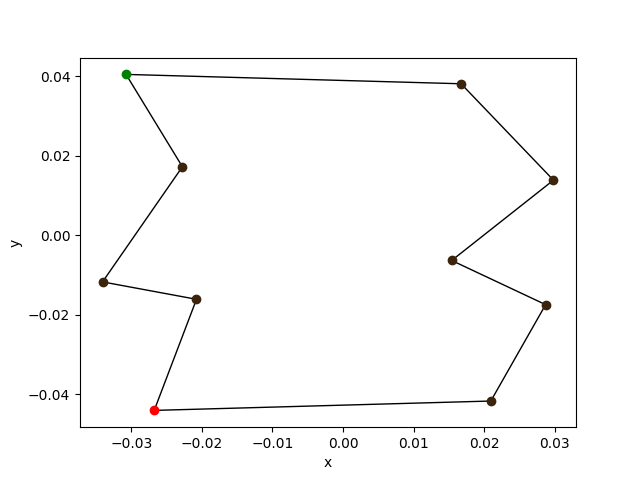

Passed
	Test 2: 

<IPython.core.display.Javascript object>


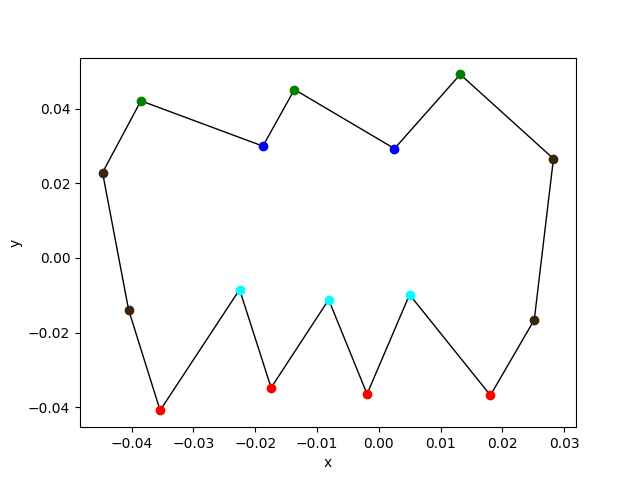

Passed
	Test 3: 

<IPython.core.display.Javascript object>


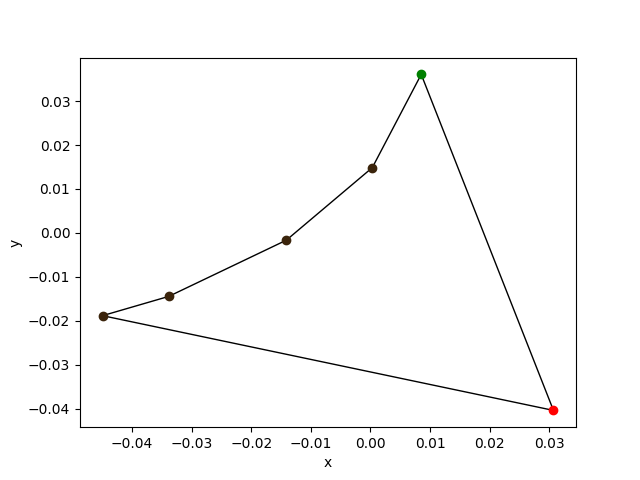

Passed
	Test 4: 

<IPython.core.display.Javascript object>


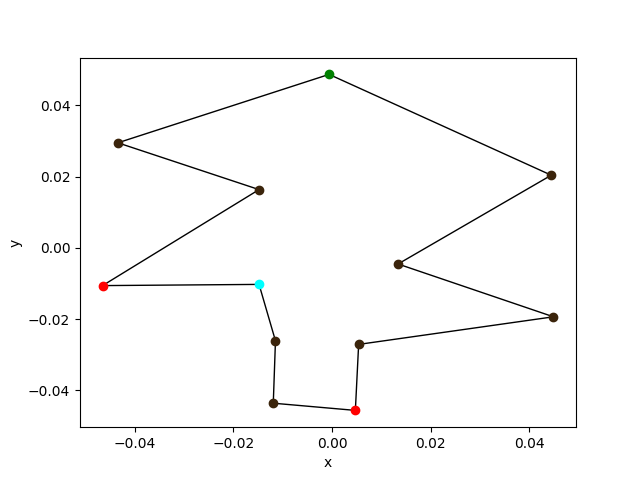

Passed
	Test 5: 

<IPython.core.display.Javascript object>


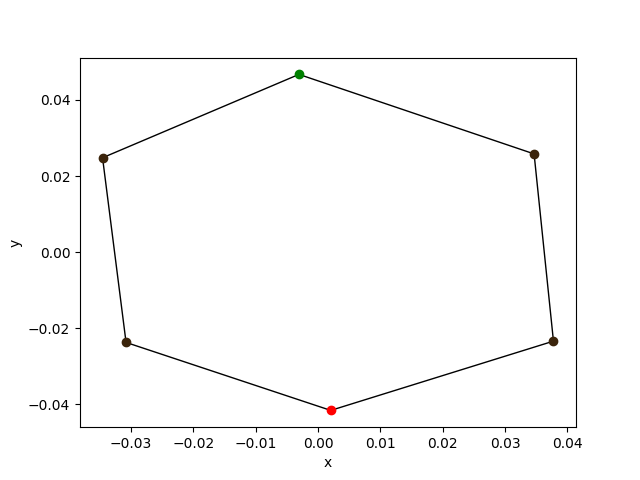

Passed
	Test 6: 

<IPython.core.display.Javascript object>


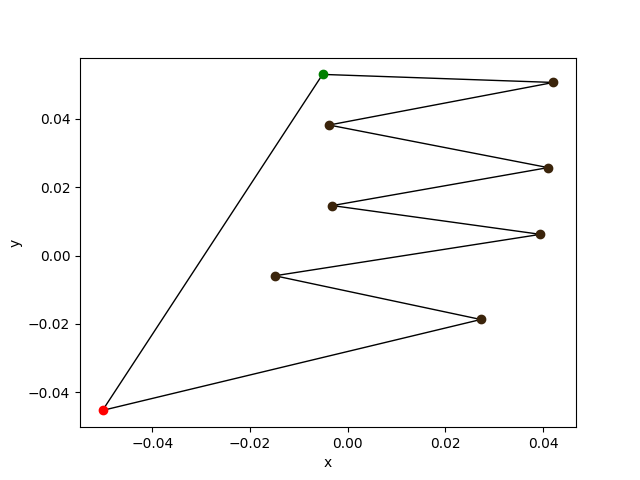

Passed
	Test 7: 

<IPython.core.display.Javascript object>


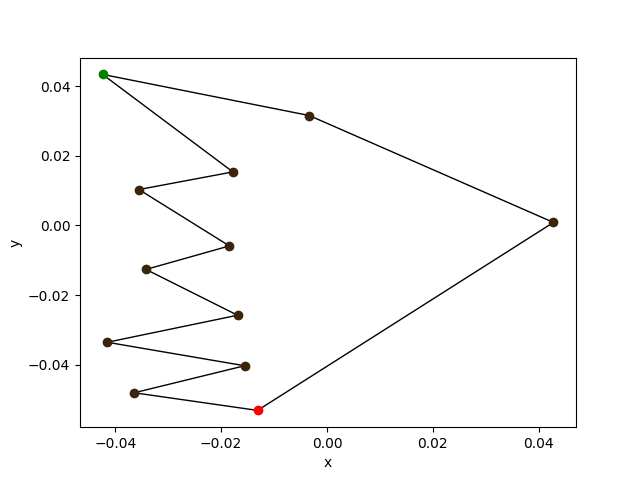

Passed
	Test 8: 

<IPython.core.display.Javascript object>


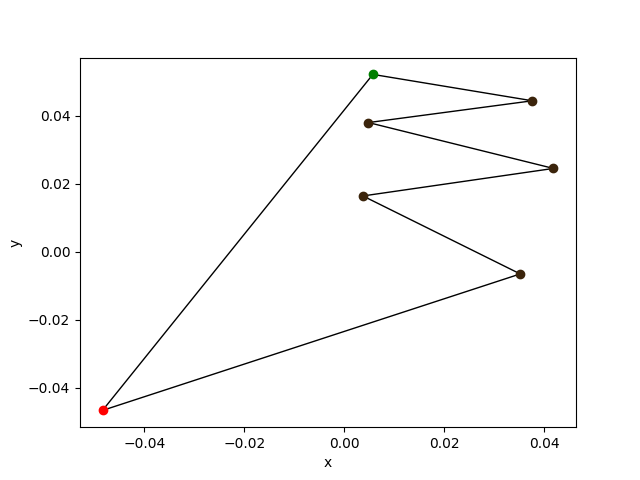

Passed
	Test 9: 

<IPython.core.display.Javascript object>


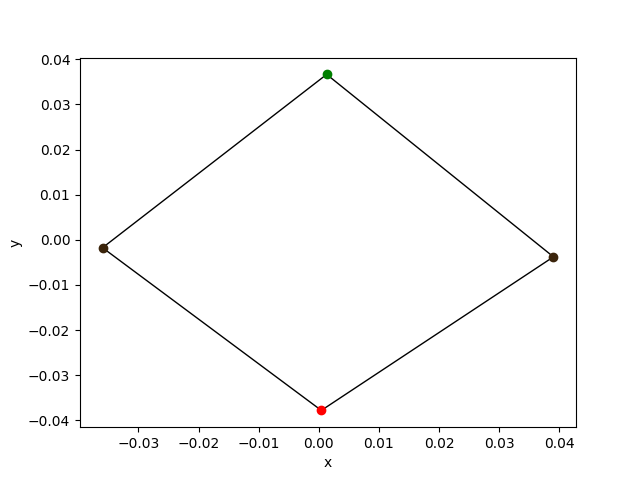

Passed
	Test 10: 

<IPython.core.display.Javascript object>


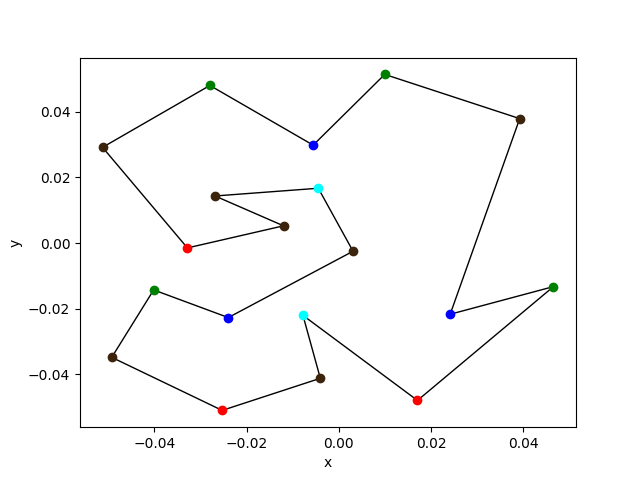

Passed
Result: 10/10
Time: 0.438s


In [48]:
Test().runtest(2, color_vertex)

Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

<IPython.core.display.Javascript object>


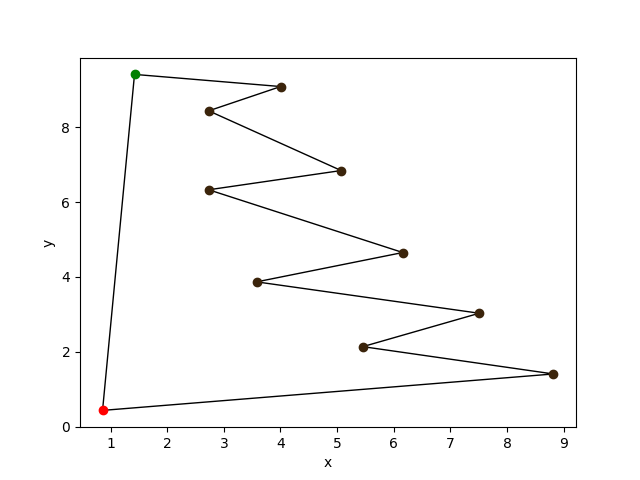

<IPython.core.display.Javascript object>


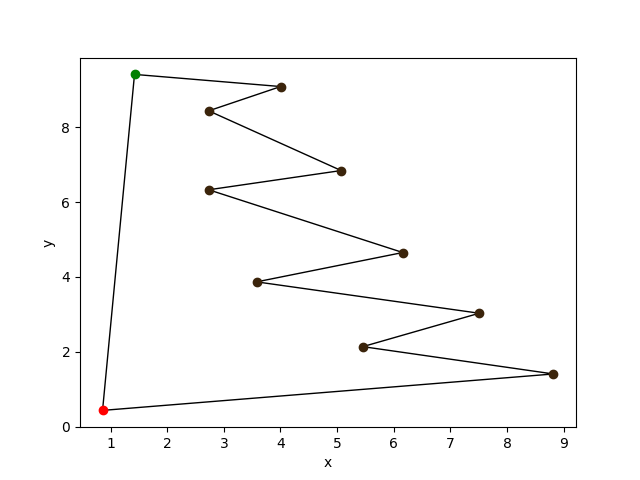

In [12]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

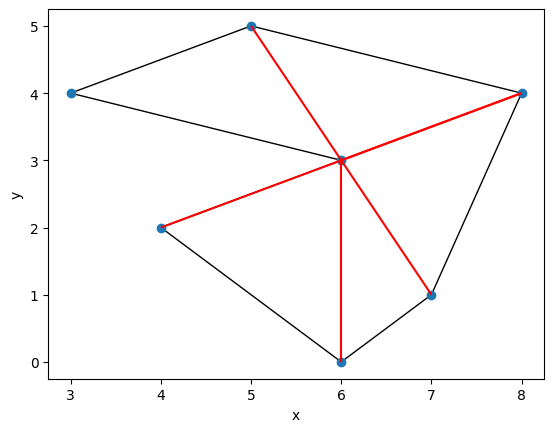

In [11]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [13]:
def triangulation(polygon):
    draw_polygon(polygon)
    def is_inside(u, w, v, ch):
        
        def mat_det_3x3(a, b, c):
            x = 0
            y = 1
            return 
        
        a = polygon[u]
        b = polygon[w]
        c = polygon[v]
        orientation = (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

        if ch == 1:
            return orientation < 0
        else:
            return orientation > 0
        
    n = len(polygon)
    CH = [0]*n
    D = []
        
    min_y_val = min(polygon, key = lambda v : v[1])
    max_y_val = max(polygon, key = lambda v : v[1])
    
    min_y_index = polygon.index(min_y_val)
    max_y_index = polygon.index(max_y_val)
    
    n = len(polygon)
    
    i, j = (max_y_index - 1)%n, (max_y_index + 1) % n
    CH[max_y_index] = 1
    CH[min_y_index] = 1
    while i != min_y_index:
        CH[i] = -1
        i = (i-1)%n
        
    while j != min_y_index:
        CH[j] = 1
        j = (j+1)%n
    
    
    index_sorted = [max_y_index]
    i, j = (max_y_index - 1)%n, (max_y_index + 1) % n
    
    while i != min_y_index and j != min_y_index:
        if polygon[i][1] > polygon[j][1]:
            index_sorted.append(i)
            i = (i-1)%n
        else:
            index_sorted.append(j)
            j = (j+1)%n
        
    while i != min_y_index:
        index_sorted.append(i)
        i = (i-1)%n
        
    while j != min_y_index:
        index_sorted.append(j)
        j = (j+1)%n    
    
    index_sorted.append(min_y_index)

#     index_sorted = [i for i in range(n)]
#     index_sorted.sort(key = lambda x : -polygon[x][1])
    
    S = []
    S.append(index_sorted[0])
    S.append(index_sorted[1])
    
    for j in range (2, n):
        v = index_sorted[j]
        if not S:
            S.append(i)
        elif CH[v] != CH[S[-1]]:
            while len(S) > 0:
                u = S.pop()
                if abs(v-u) not in [1, n-1]:
                    D.append([v,u])
            S.append(index_sorted[j-1])
            S.append(v)
        else:
            for k in range(len(S)-1,0,-1):
                if is_inside(v,S[k],S[k-1],CH[v]):
                    if abs(v-S[k-1]) not in  [1,n-1]:
                        D.append([v,S[k-1]])
                        S.pop()
                else:
                    break
            S.append(v)

    tri = []
    for i in range(len(D)):
        tri.append([polygon[D[i][0]],polygon[D[i][1]]])
    draw_polygon_tri(polygon, tri)
    return D
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


Lab 3, task 3:
	Test 1: 

<IPython.core.display.Javascript object>


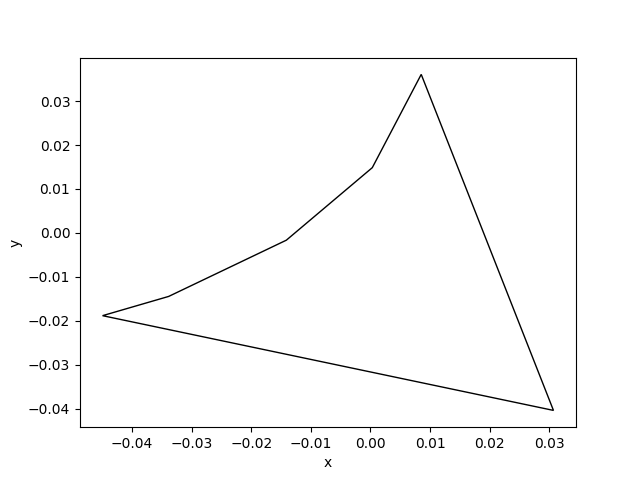

<IPython.core.display.Javascript object>


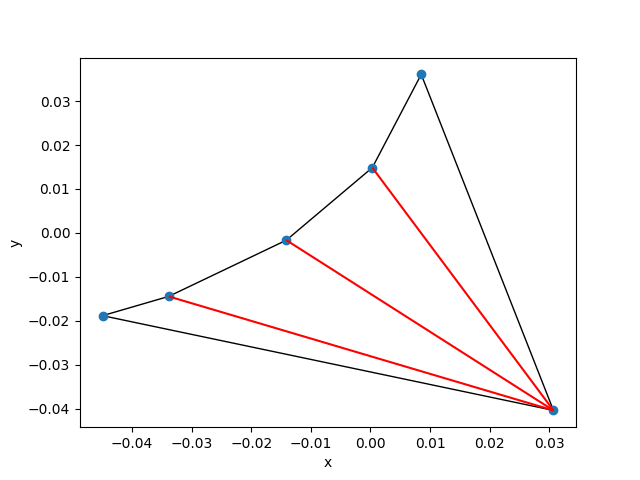

Passed
	Test 2: 

<IPython.core.display.Javascript object>


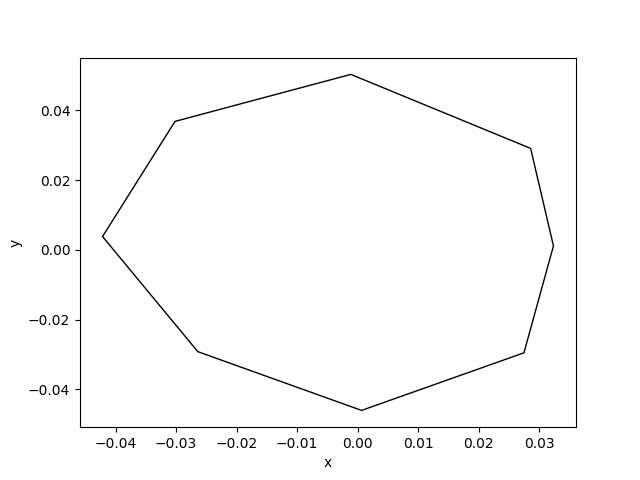

<IPython.core.display.Javascript object>


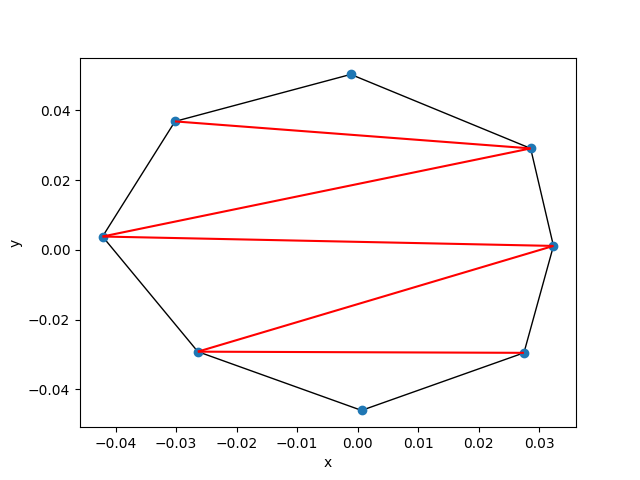

Passed
	Test 3: 

<IPython.core.display.Javascript object>


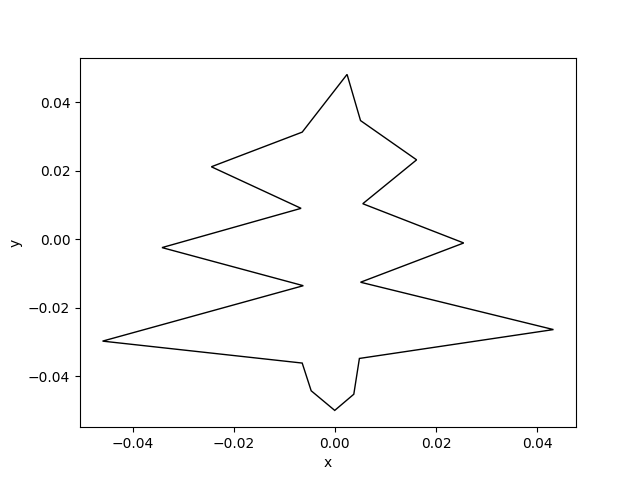

<IPython.core.display.Javascript object>


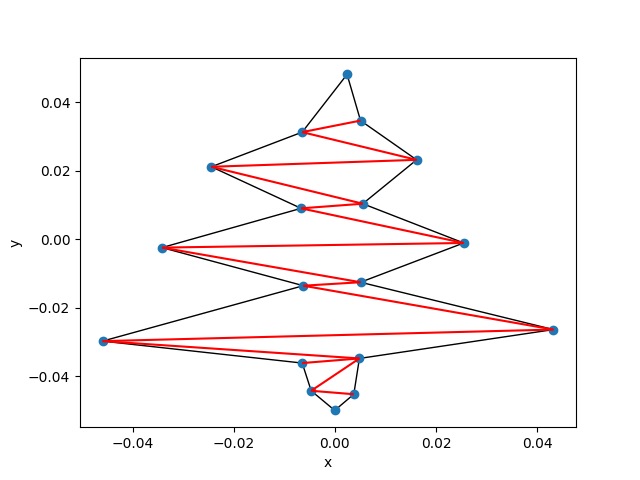

Passed
	Test 4: 

<IPython.core.display.Javascript object>


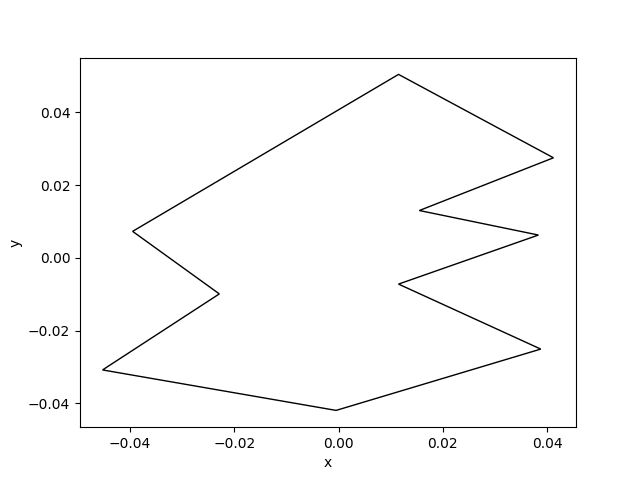

<IPython.core.display.Javascript object>


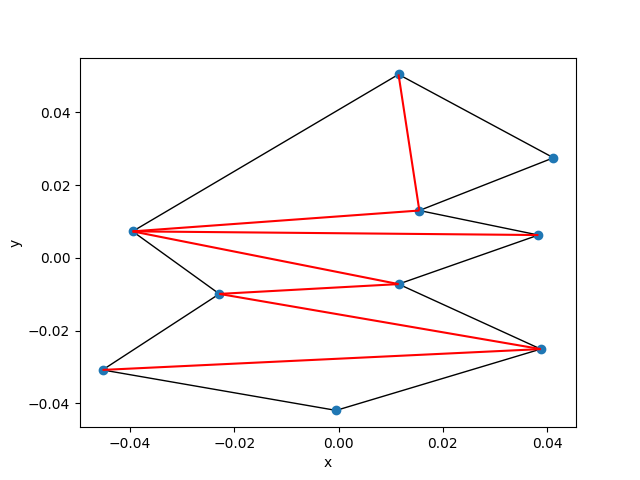

Passed
	Test 5: 

<IPython.core.display.Javascript object>


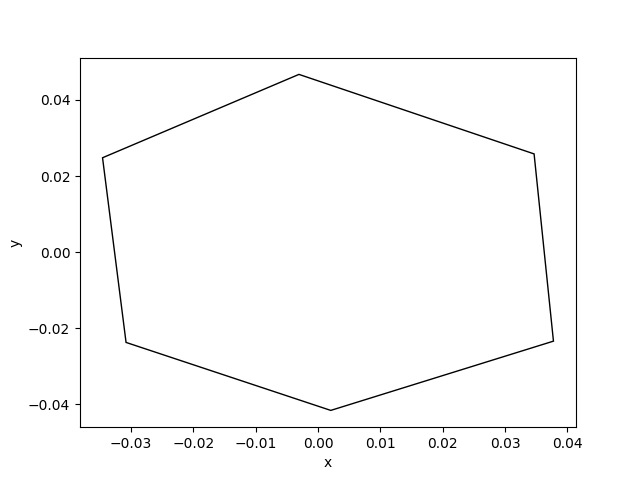

<IPython.core.display.Javascript object>


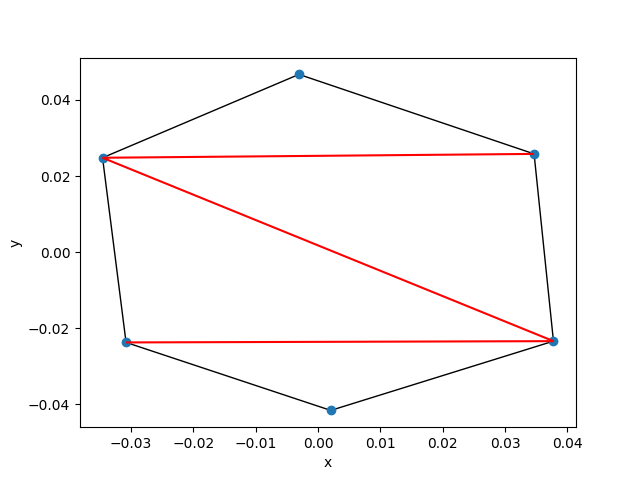

Passed
	Test 6: 

<IPython.core.display.Javascript object>


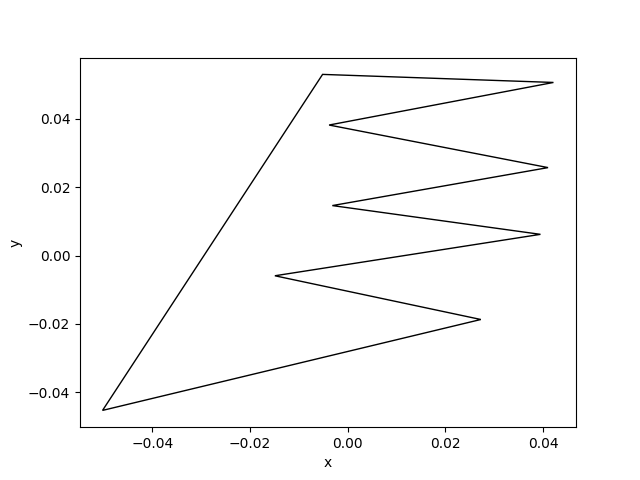

<IPython.core.display.Javascript object>


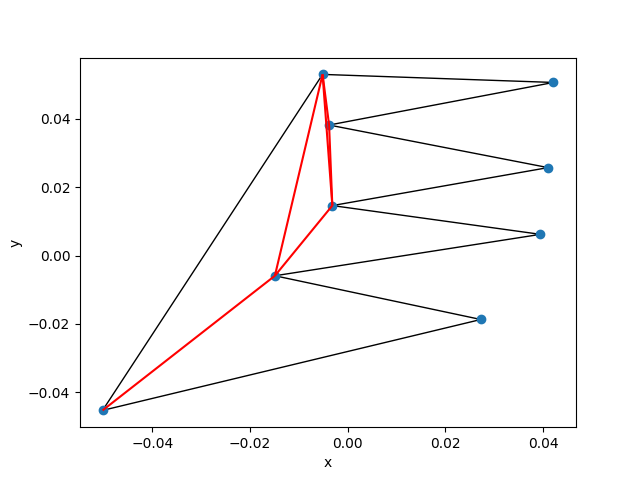

Passed
	Test 7: 

<IPython.core.display.Javascript object>


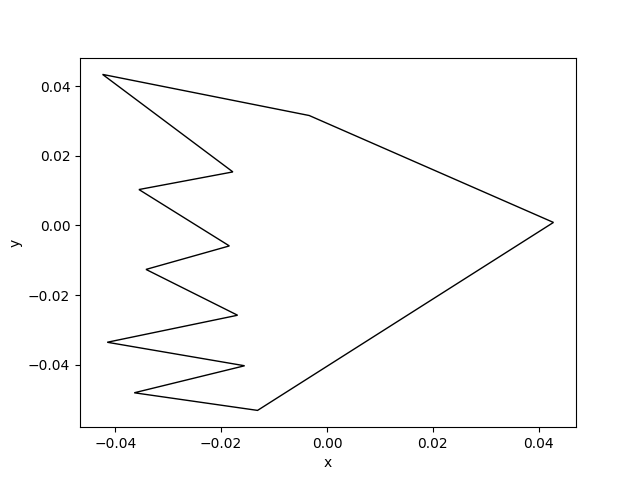

<IPython.core.display.Javascript object>


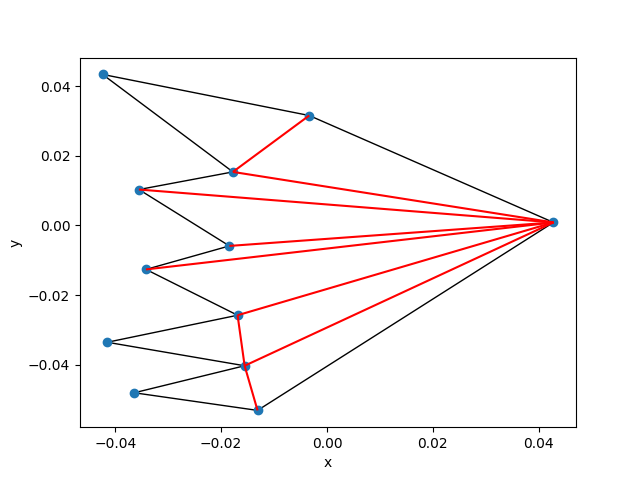

Passed
	Test 8: 

<IPython.core.display.Javascript object>


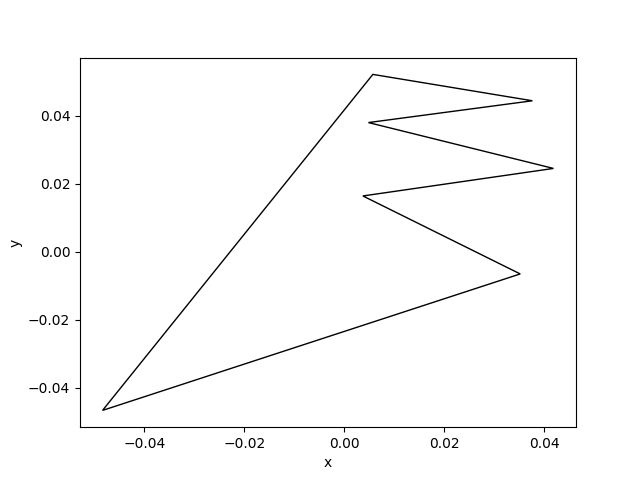

c:\users\hp 8-gen\desktop\gea\algorytmy-geometryczne\bitalg\visualizer\plot\plot.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


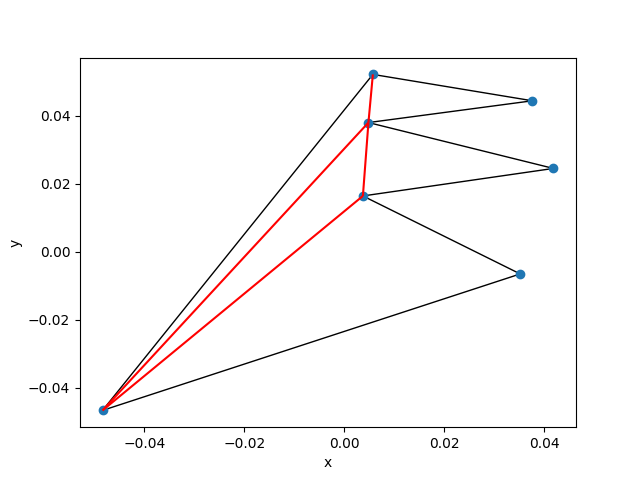

Passed
	Test 9: 

<IPython.core.display.Javascript object>


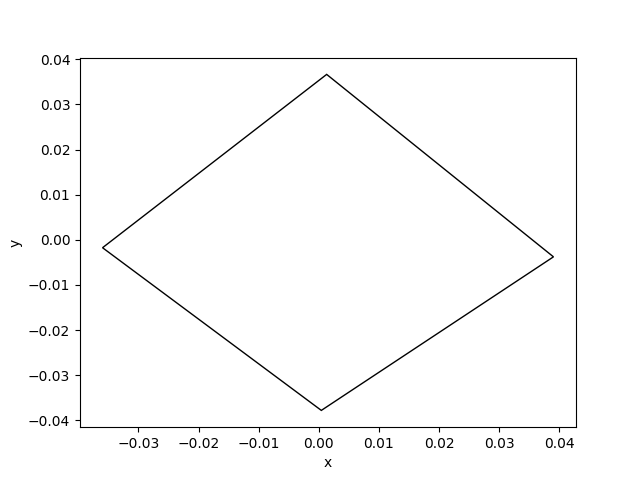

<IPython.core.display.Javascript object>


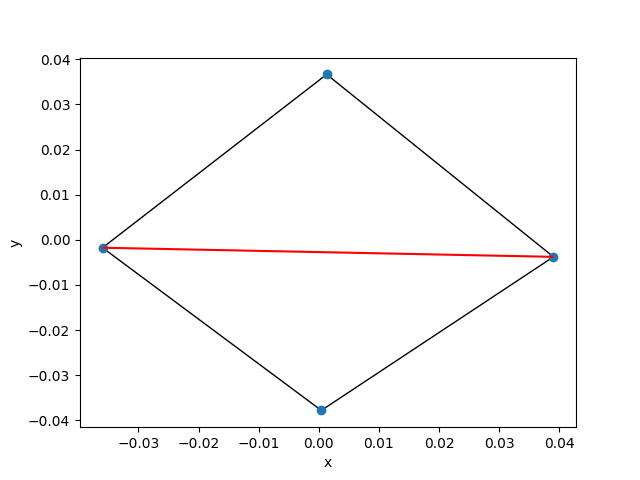

Passed
	Test 10: 

<IPython.core.display.Javascript object>


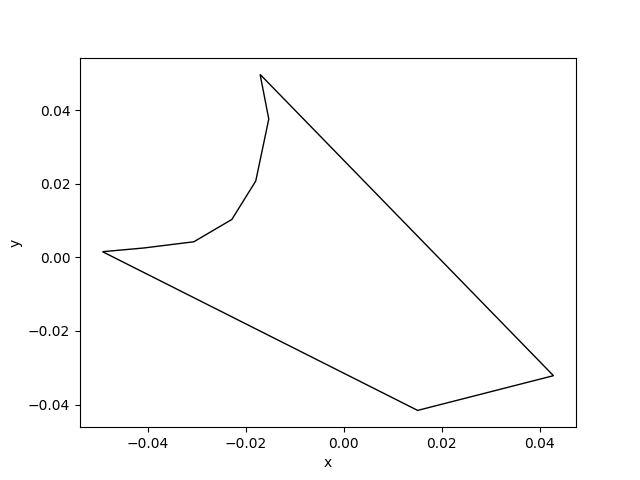

<IPython.core.display.Javascript object>


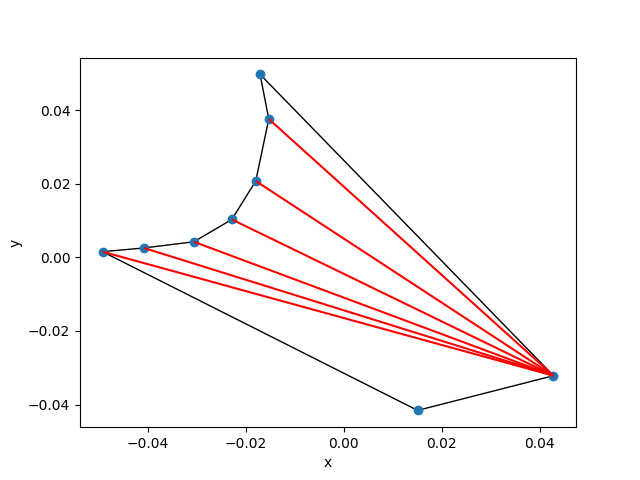

Passed
Result: 10/10
Time: 0.078s


In [56]:
Test().runtest(3, triangulation)

Zwizualizuj powstały wielokąt podzielony na trójkąty.

<IPython.core.display.Javascript object>


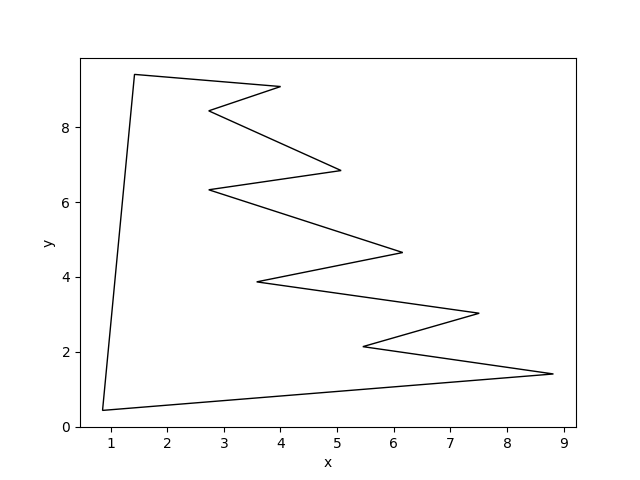

<IPython.core.display.Javascript object>


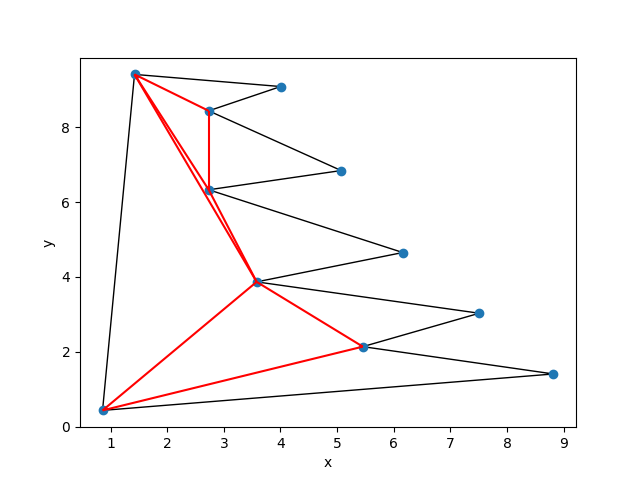

In [14]:
tri = triangulation(polygon)
# draw_polygon_tri(polygon,tri)

<IPython.core.display.Javascript object>


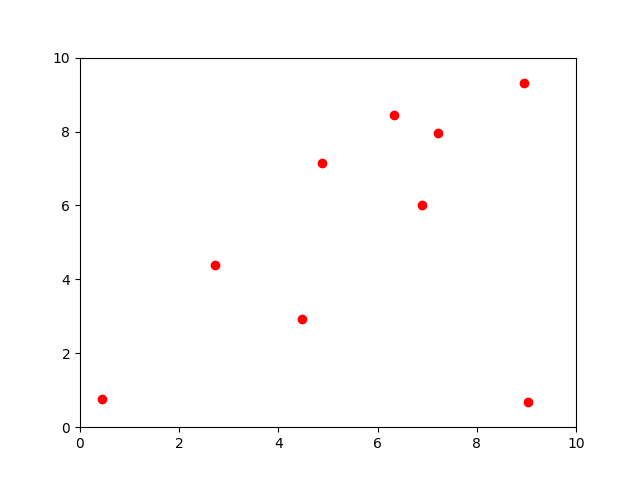

In [82]:
poly_2 = PolygonDrawer()
poly_2_points = poly_2.points

<IPython.core.display.Javascript object>


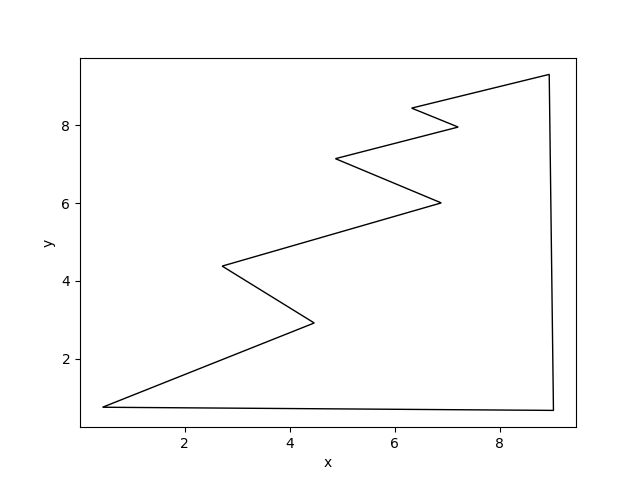

<IPython.core.display.Javascript object>


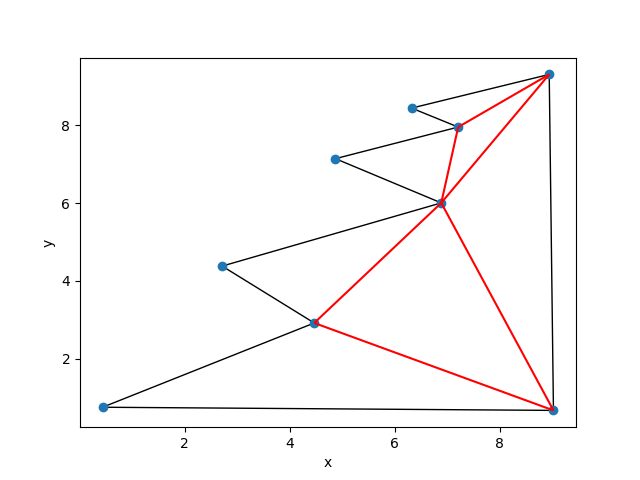

[[2, 0], [4, 2], [4, 0], [6, 4], [8, 6], [8, 4]]

In [84]:
poly_2_points
triangulation(poly_2_points)

<IPython.core.display.Javascript object>


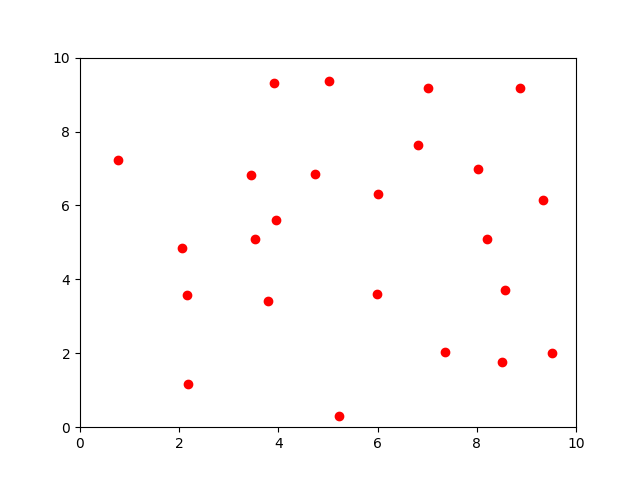

In [90]:
poly_3 = PolygonDrawer()
poly_3_points = poly_3.points

<IPython.core.display.Javascript object>


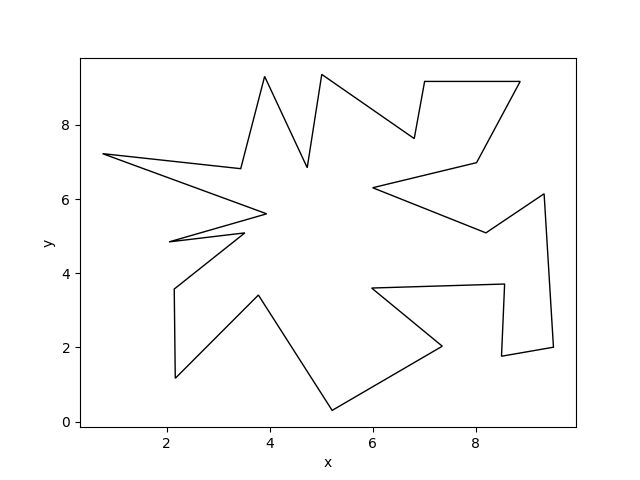

In [92]:
draw_polygon(poly_3_points)


<IPython.core.display.Javascript object>


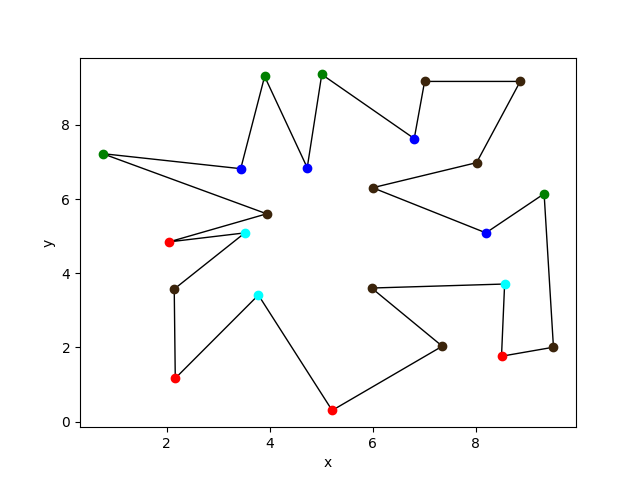

In [94]:
colors_3 = color_vertex(poly_3_points)


In [26]:
def triangulation_vis(polygon):

    vis = Visualizer()
    vis.add_polygon(polygon)

    def is_inside(u, w, v, ch):
        
        def mat_det_3x3(a, b, c):
            x = 0
            y = 1
            return 
        
        a = polygon[u]
        b = polygon[w]
        c = polygon[v]
        orientation = (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

        if ch == 1:
            return orientation < 0
        else:
            return orientation > 0
        
    n = len(polygon)
    CH = [0]*n
    D = []
        
    min_y_val = min(polygon, key = lambda v : v[1])
    max_y_val = max(polygon, key = lambda v : v[1])
    
    min_y_index = polygon.index(min_y_val)
    max_y_index = polygon.index(max_y_val)
    
    n = len(polygon)
    
    i, j = (max_y_index - 1)%n, (max_y_index + 1) % n
    CH[max_y_index] = 1
    CH[min_y_index] = 1
    while i != min_y_index:
        CH[i] = -1
        i = (i-1)%n
        
    while j != min_y_index:
        CH[j] = 1
        j = (j+1)%n
    
    
    index_sorted = [max_y_index]
    i, j = (max_y_index - 1)%n, (max_y_index + 1) % n
    
    while i != min_y_index and j != min_y_index:
        if polygon[i][1] > polygon[j][1]:
            index_sorted.append(i)
            i = (i-1)%n
        else:
            index_sorted.append(j)
            j = (j+1)%n
        
    while i != min_y_index:
        index_sorted.append(i)
        i = (i-1)%n
        
    while j != min_y_index:
        index_sorted.append(j)
        j = (j+1)%n    
    
    index_sorted.append(min_y_index)

#     index_sorted = [i for i in range(n)]
#     index_sorted.sort(key = lambda x : -polygon[x][1])
    vis_points = [None for _ in range(len(polygon))]
    S = []
    S.append(index_sorted[0])
    vis_points[index_sorted[0]] = vis.add_point(polygon[index_sorted[0]], color='red')
    
    S.append(index_sorted[1])
    vis_points[index_sorted[1]] = vis.add_point(polygon[index_sorted[1]], color='red')
    
    for j in range(2, n):
        v = index_sorted[j]
        if CH[v] != CH[S[-1]]:
            while len(S) > 0:
                u = S.pop()

                vis.remove_figure(vis_points[u])
                d = vis.add_line_segment((polygon[u],polygon[v]),color='red')

                if abs(v - u) not in [1, n - 1]:
                    D.append([v, u])
                else:

                    vis.remove_figure(d)
            S.append(index_sorted[j - 1])
            vis_points[index_sorted[j - 1]] = vis.add_point(polygon[index_sorted[j - 1]], color='red')

            S.append(v)
            vis_points[v] = vis.add_point(polygon[v], color='red')

        else:
            for k in range(len(S) - 1, 0, -1):
                flag = False
                d = vis.add_line_segment((polygon[S[k-1]],polygon[v]),color='red')

                if is_inside(v, S[k], S[k - 1], CH[v]):
                    if abs(v - S[k - 1]) not in [1, n - 1]:
                        D.append([v, S[k - 1]])
                        # Visualize the current diagonal
                        tmp = S.pop()

                        vis.remove_figure(vis_points[tmp])
                        flag = True
                else:

                    vis.remove_figure(d)
                    break
                if not flag:

                    vis.remove_figure(d)
            S.append(v)
            vis_points[v] = vis.add_point(polygon[v], color='red')
            print(vis_points[v])

    vis.remove_figure(vis_points[S[0]])
    vis.remove_figure(vis_points[S[1]])
    tri = []
    for i in range(len(D)):
        tri.append([polygon[D[i][0]],polygon[D[i][1]]])
#     draw_polygon_tri(polygon, tri)
    return D, vis

In [27]:

_, V = triangulation_vis(polygon_example_1)

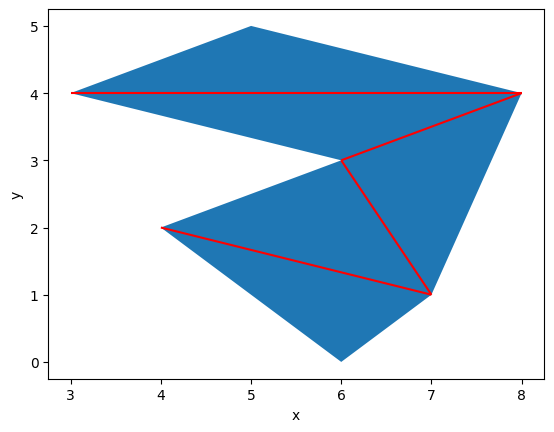

In [28]:
V.show()

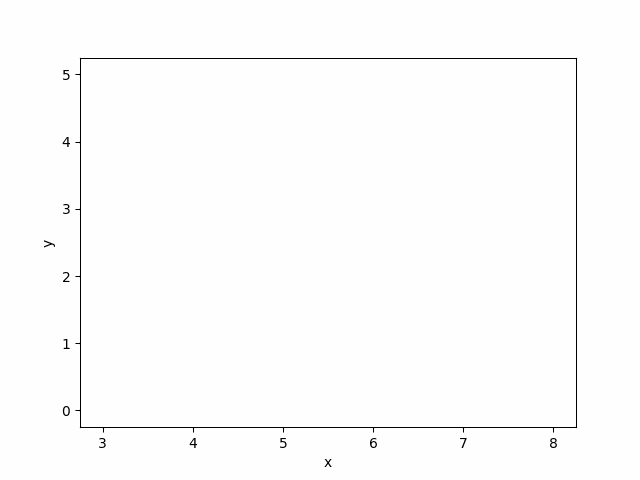

In [29]:
V.show_gif()

In [37]:
%matplotlib inline
_, V1 = triangulation_vis(polygon)

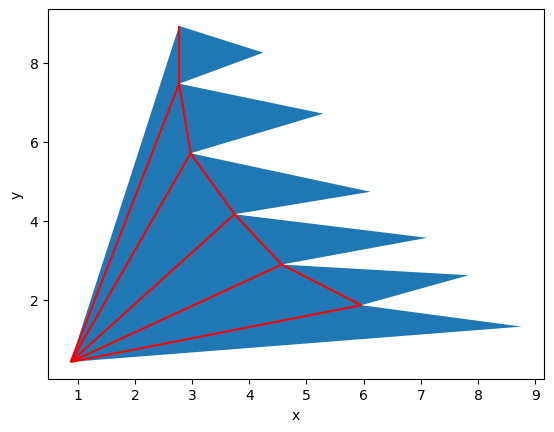

In [38]:
V1.show()

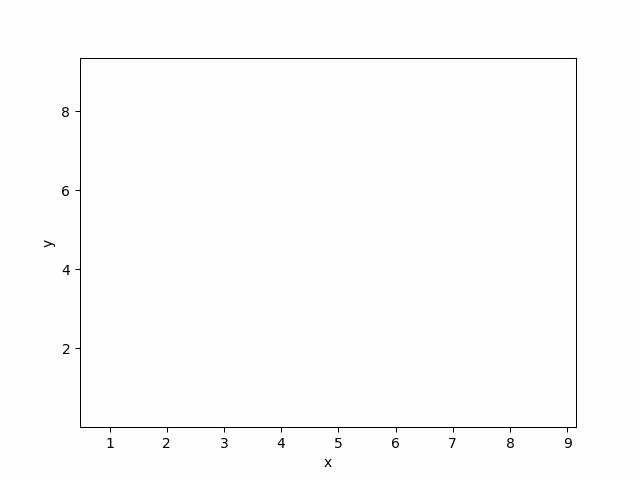

In [39]:
V1.show_gif()